# Đồ án cuối kì

MSSV: 1712525

Họ và tên: Nguyễn Ngọc Minh Khánh

## Import thư viện

In [74]:
import pandas as pd
import warnings
import numpy as np
import matplotlib .pyplot as plt
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 22, 15
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

---

## Lấy dữ liệu

Dữ liệu được dùng trong đồ án cuối kì này là file winemag-data-130k-v2.csv. Đây là dữ liệu về đánh giá điểm và nhận xét về chất lượng của các loại rượu thuộc nhiều khu vực, nhiều quốc gia. Dữ liệu được lấy từ dataset "wine-reviews" trên kaggle. Dữ liệu gốc có thể lấy [tại đây](https://www.kaggle.com/zynicide/wine-reviews) 

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
wine_df = pd.read_csv('winemag-data-130k-v2.csv')
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Số lượng dòng và cột của dữ liệu

In [3]:
num_rows = wine_df.shape[0]
num_cols = wine_df.shape[1]
print('Số lượng dòng: ', num_rows)
print('Số lượng cột: ', num_cols)

Số lượng dòng:  129971
Số lượng cột:  14


### Mô tả ý nghĩa của mỗi dòng và cột

Mỗi dòng là nhận xét, đánh giá điểm số và các thông tin khác của 1 loại rượu ở 1 vùng cụ thể.

Dưới đây là phần mô tả của tác giả về ý nghĩa của các cột trong file winemag-data-130k-v2.csv:

+ **Points**: the number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)
+ **Title**: the title of the wine review, which often contains the vintage if you're interested in extracting that feature
+ **Variety**: the type of grapes used to make the wine (ie Pinot Noir)
+ **Description**: a few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.
+ **Country**: the country that the wine is from
+ **Province**: the province or state that the wine is from
+ **Region 1**: the wine growing area in a province or state (ie Napa)
+ **Region 2**: sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank
+ **Winery**: the winery that made the wine
+ **Designation**: the vineyard within the winery where the grapes that made the wine are from
+ **Price**: the cost for a bottle of the wine
+ **Taster Name**: name of the person who tasted and reviewed the wine
+ **Taster Twitter Handle**: Twitter handle for the person who tasted ane reviewed the wine

### Kiểu dữ liệu và số lượng giá trị khác rỗng của mỗi cột

In [4]:
wine_df.drop(columns='Unnamed: 0', inplace = True)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


Các cột dạng categorical là: country, description, designation, province, region_1, region_2, taster_name, taster_twitter_handle, title, variety, winery.
Các cột còn là là point và price mang giá trị thuộc numerical

### Số lượng giá trị thiếu cũng mỗi cột

In [5]:
wine_df.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

### Một số thống kê mô tả đơn giản

In [6]:
wine_df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


Nhìn vào thống kê trên:
+ Points: miền giá trị của thuộc tính points là [80, 100], trung bình là 88.45
+ Price: miền giá trị là từ [4, 3300] ( đô la mỹ), với giá trung bình là 41 đô

In [8]:
num_country = wine_df['country'].nunique()
print("Số lượng quốc gia khảo sát: ", num_country)

Số lượng quốc gia khảo sát:  43


### Làm rõ hơn ý nghĩa của các cột country, province, region_1, region_2


Theo mô tả của tác giả: 
- **Country**: the country that the wine is from
- **Province**: the province or state that the wine is from
- **Region 1**: the wine growing area in a province or state (ie Napa)
- **Region 2**: sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa -Valley), but this value can sometimes be blank

Như vậy, country là đơn vị lớn nhất chỉ 1 quốc gia, country thì gồm nhiều province. Province thì bao gồm nhiều region_1, còn region1 thì bao gồm nhiều region_2 (vùng, địa điểm cụ thể thuộc về region_1), có nhiều mẫu giá trị ở region_2 giống với region_1 hoặc là không có giá trị. Ở đây việc kiểm tra các Province có bị overlap với nhau hay không cũng không mang nhiều ý nghĩa ( tức là 1 region vừa thuộc province này vừa thuộc province kia ).

---

## Tiền xử lí dữ liệu trước khi thực hiện các bước khám phá dữ liệu kế tiếp

### Xóa các thuộc tính không mang nhiều ý nghĩa hoặc các giá trị gây khó trong phân tích

 - Thuộc tính designation: có số lượng các giá trị khác nhau( không bao gồm NaN) là rất lớn.Những thuộc tính này cũng không mang lại nhiều ý nghĩa cho việc phân tích nên ta đơn giản là xóa thuộc tính này đi.
 - Thuộc tính taster_twitter_handle: thuộc tính này không mang ý nghĩa trong bài phân tích nên ta đơn giản xóa đi.

In [9]:
print("Số lượng các giá trị khác nhau của thuộc tính designation là: ",  wine_df['designation'].nunique())

Số lượng các giá trị khác nhau của thuộc tính designation là:  37979


In [10]:
wine_df.drop(columns=['designation', 'taster_twitter_handle'], inplace = True)

 Nếu kiểm tra lại trong dữ liệu thì chỉ có 1 mẫu thuộc về Ai Cập và giá trị ở price của nó cũng là NaN. Nên ở đây ta không biết nên cập nhật giá của loại rượu ở quốc gia này như thế nào nên để đơn giản cho việc xử lí bên dưới ta xóa luôn dòng thuộc về Ai Cập.

In [ ]:
wine_df[wine_df['country']=='Egypt']

In [ ]:
wine_df = wine_df[wine_df['country']!='Egypt'].reset_index(drop = True)

### Xử lí với các giá trị thiếu

Như bước phân tích trên ta thấy có nhiều cột mang nhiều giá trị thiếu:

- Các xử lí đối với các cột categorical:
    + Các thuộc tính categorical dùng giá trị 'unknown' để điền vào các giá trị còn thiếu.  Ở đây không nên sử dụng phương pháp back fill, vì có thể điền tên khu vực của 1 quốc gia này cho khu vực của 1 quốc gia khác.
    
- Các xử lí đối với thuộc tính numerical:
    + Thuộc tính price: ta tiến hành điền giá trị trung bình của các loại rượu thuộc cùng quốc gia cho các giá trị thiếu:

Xử lí với các thuộc tính categorical

In [18]:
wine_df['country'].fillna('unknown', inplace = True)
wine_df['region_1'].fillna('unknown', inplace = True)
wine_df['region_2'].fillna('unknown', inplace = True)
wine_df['taster_name'].fillna('unknown', inplace = True)
wine_df['province'].fillna('unknown', inplace = True)
wine_df['variety'].fillna('unknown', inplace = True)

Xử lí với các thuộc tính numerical

In [14]:
isnull_price = wine_df['price'].isnull()
mean_price_wine_byCountry = wine_df.groupby('country')['price'].agg('mean')
wine_df['price'] = [mean_price_wine_byCountry[wine_df.iloc[i][0]] if isnull_price[i]
                                                                  else wine_df.iloc[i]['price'] for i in range(num_rows-1)]

### Kiểm tra lại kết quả của việc xử lí

In [20]:
wine_df.isnull().sum()

country        0
description    0
points         0
price          0
province       0
region_1       0
region_2       0
taster_name    0
title          0
variety        0
winery         0
dtype: int64

---

## Featuring engineering

### Việc thực hiện các bài đánh giá diễn ra trong khoảng gian nào? cùng năm hay thuộc các năm khác nhau?

Ở đây ta vẫn chưa biết được việc đánh giá các loại rượu diễn ra ở trong cùng 1 năm hay ở nhiều năm khác nhau. Vậy nơi nào cho biết thời gian diễn ra năm đánh giá? Nếu

Nếu để ý kĩ, ta sẽ thấy năm đánh giá nằm trong thuộc tính title. Giờ ta sẽ tiến hành trích xuất khoảng thời gian này.

In [23]:
wine_df = wine_df.assign(year = wine_df['title'].str.extract(r'(\d{4})'))
wine_df['year']

### Xử dụng kĩ thuật back fill để điền các giá trị thiếu trong thuộc tính year

kĩ thuật điền giá trị thiếu bằng giá trị khác null liền sau gần nhất

In [29]:
print("Số lượng giá trị thiếu trong thuộc tính năm là:", wine_df.year.isnull().sum())

Số lượng giá trị thiếu trong thuộc tính năm là: 4609


In [32]:
wine_df['year'].fillna(method = 'bfill', inplace = True)
print("Số lượng giá trị thiếu trong thuộc tính năm là:", wine_df.year.isnull().sum())

Số lượng giá trị thiếu trong thuộc tính năm là: 0


### Tạo thêm thuộc tính provinceOfCountry

- Là việc kết hợp 2 thuộc tính province và country. Thuộc tích được tạo mới phục vụ tốt hơn cho việc trực quan

In [47]:
wine_df['provinceOfCountry'] = '( ' + wine_df['country'] + ' ) ' + wine_df['province']
wine_df['provinceOfCountry'].head()

0    ( Italy ) Sicily & Sardinia
1             ( Portugal ) Douro
2                  ( US ) Oregon
3                ( US ) Michigan
4                  ( US ) Oregon
Name: provinceOfCountry, dtype: object

---

## Đưa ra các câu hỏi cần trả lời

Sau khi có cái nhìn tổng quát và hiểu hơn về dữ liệu, giờ đây mình bắt đầu thấy tò mò và đặt nhiều câu hỏi trong đầu. May thay những câu hỏi này đều có thể giải quyết thông qua dữ liệu.

**1**. Những tỉnh thành nào có nhiều khu vực sản suất rượu nhất và mức giá rượu trung bình , điểm số trung bình xuất xứ từ các tỉnh thành này.


**2**. Những quốc gia nào có nhiều tỉnh thành sản suất rượu nhất và mức giá rượu trung bình, điểm số trung bình xuất xứ từ quốc gia này.

**3** Những nhà sản suất rượu vang nào nổi tiếng nhất thế giới Masseto, Fontodi

**3**. Những loại rượu 20 loại rượu được ưa chuộng nhất và giá của chúng. 


**4**. Mối quan hệ giữa điểm số và số lượng từ trong phần đánh giá. 


**5**. Những từ ngữ được dùng nhiều nhất để đánh giá về top 100 loại rượu được ưu chuộng nhất.


**6**. So sánh các loại rượu nổi tiếng được trồng giữa các quốc gia.( không biết 1 loại rượu có thể xuất hiện ở nhiều quốc gia hay không ) Sangiovese

**7**. 5 tác giả nào có nhiều bài review nhất và khoảng điểm họ cho trong bài review của mình.

## Phân tích dữ liệu để trả lời cho các câu hỏi

`Trước khi đi vào trả lời các câu hỏi về rượu nho. Chúng ta hãy nạp thêm 1 ít kiến thức về rượu nho nào.`

 - Với mỗi quốc gia làm rượu vang, thì mỗi nước có công thức và vùng đất nào đó thích hợp cho việc trồng nho làm rượu. Rượu vang được làm từ những trái nho. Ở đây, nho được chọn làm rượu vang là những trái có tiêu chuẩn riêng như trái nhỏ, ngọt, có da dày và chứa hạt. Có rất nhiều rất nhiều loại nho dung làm rượu thương mại đã được xác định, nhưng chỉ có khoản 150 loại được trồng làm rượu vang trên thế giới.

Rượu vang là gì?

- **Độ ngon** của 1 chai rượu thường được quyết định bởi 3 yếu tố:
    + Giống nho
    + Vùng trồng nho
    + Quy trình sản suất
    
 
<font color='blue'> Giống nho </font>:  có rất nhiều giống nho được sử dụng làm rượu vang, mỗi giống sẽ có màu, mùi vị khác nhau. 
    
- Các vùng trồng nho nổi tiếng trên thế giới:
 + Nước Italia : Tuscany
 + Nước Tây Ban Nha: vùng rượu vang Rioja
 + Nước Pháp:Vùng rượu vang Bordeaux

### Những tỉnh thành nào có nhiều khu vực sản suất rượu nhất và mức giá rượu trung bình , điểm số trung bình xuất xứ từ các tỉnh thành này.

**Độ ngon** của 1 chai rượu vang được quyết định bởi loại nho làm nên. Tuy nhiên có thể nói thổ nhưỡng, và khí hậu tại vùng trồng nho là yếu tố quyết định để tạo nên rượu vang với hương vị hoàn hảo. Tại mỗi vùng trồng nho đều có hàm lượng khoáng chất nuôi dưỡng cây nho và khí hậu đặc trưng. Có những loại nho chỉ có thể phát triển trên những mảnh đất đặc thù mà không thể tạo ra trên những mảnh đất khác.

--> Đó là lí do đầu tiên để chúng ta tiến hành phân tích những vùng trồng nho nổi tiếng nhất thế giới.

In [58]:
best_place_for_wine = wine_df.groupby('provinceOfCountry')['region_1'].agg('count').sort_values(ascending = False)
best_place_for_wine

provinceOfCountry
( US ) California                        36247
( US ) Washington                         8639
( France ) Bordeaux                       5941
( Italy ) Tuscany                         5897
( US ) Oregon                             5373
                                         ...  
( Greece ) Monemvasia                        1
( Croatia ) Middle and South Dalmatia        1
( Greece ) Markopoulo                        1
( Cyprus ) Kathikas                          1
( Greece ) Mavrodaphne de Cephalonie         1
Name: region_1, Length: 425, dtype: int64

Text(0.5, 1.0, 'Những tỉnh có nhiều khu vực sản suât rượu nho nhất')

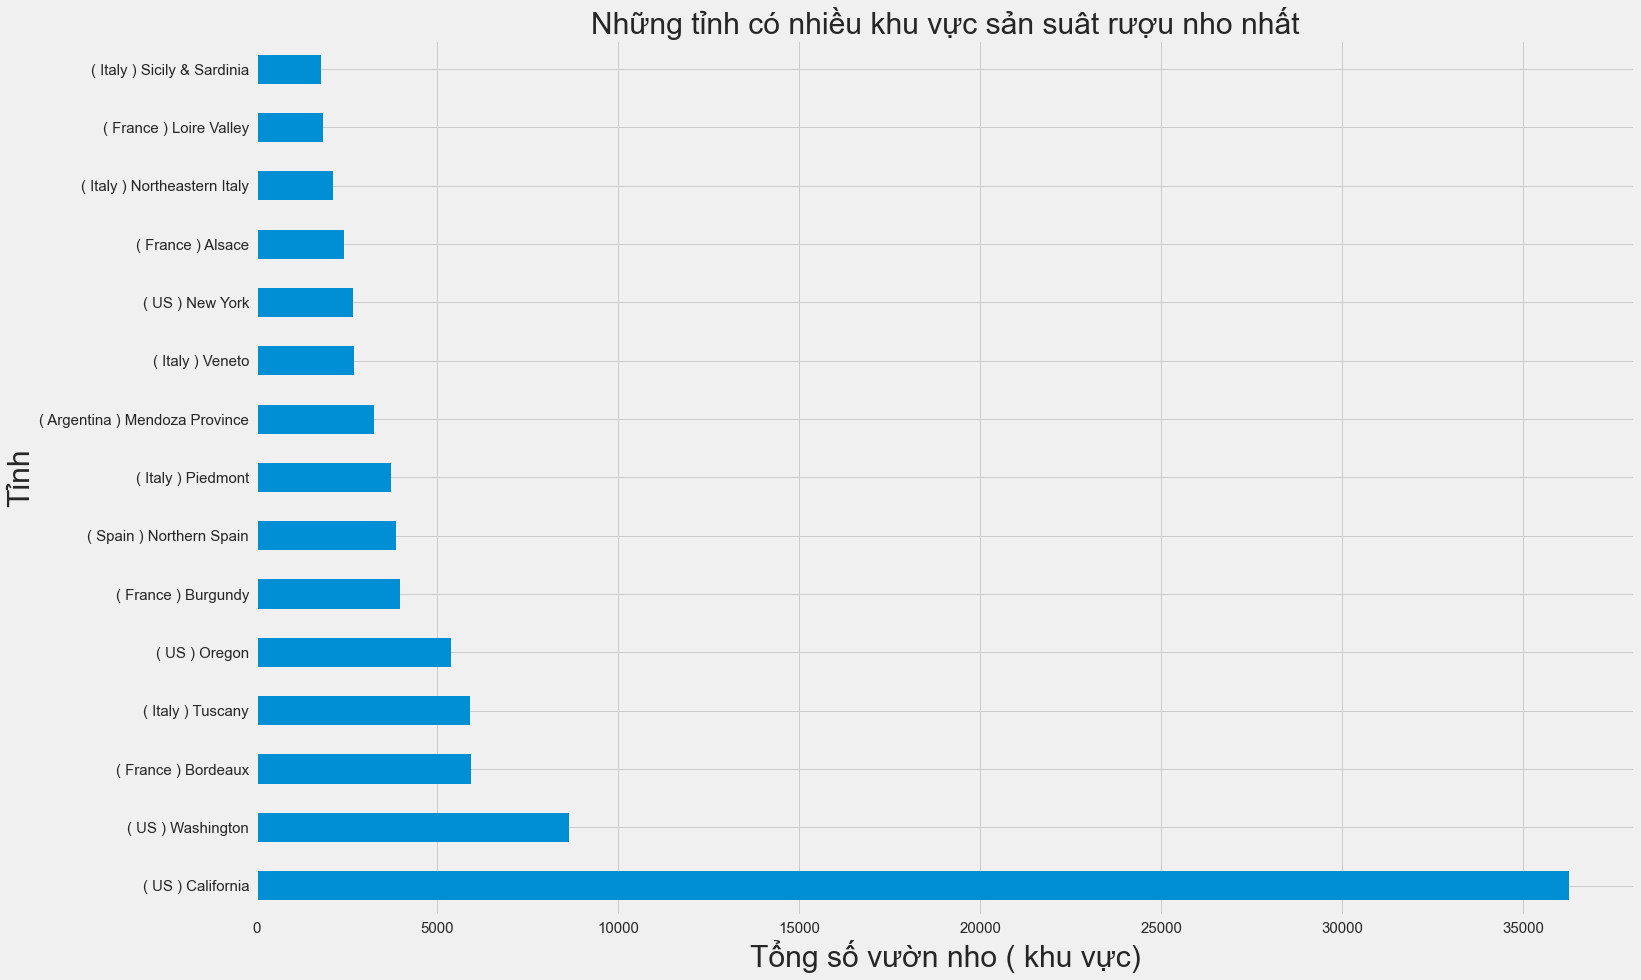

In [87]:
best_place_for_wine[:15].plot.barh(use_index = True)
plt.xlabel('Tổng số vườn nho ( khu vực)', fontsize = 30)
plt.ylabel('Tỉnh',fontsize = 30)
plt.title('Những tỉnh có nhiều khu vực sản suât rượu nho nhất', fontsize = 30)

- nhận xét

Text(0.5, 1.0, 'The regions that produce the first-class wines')

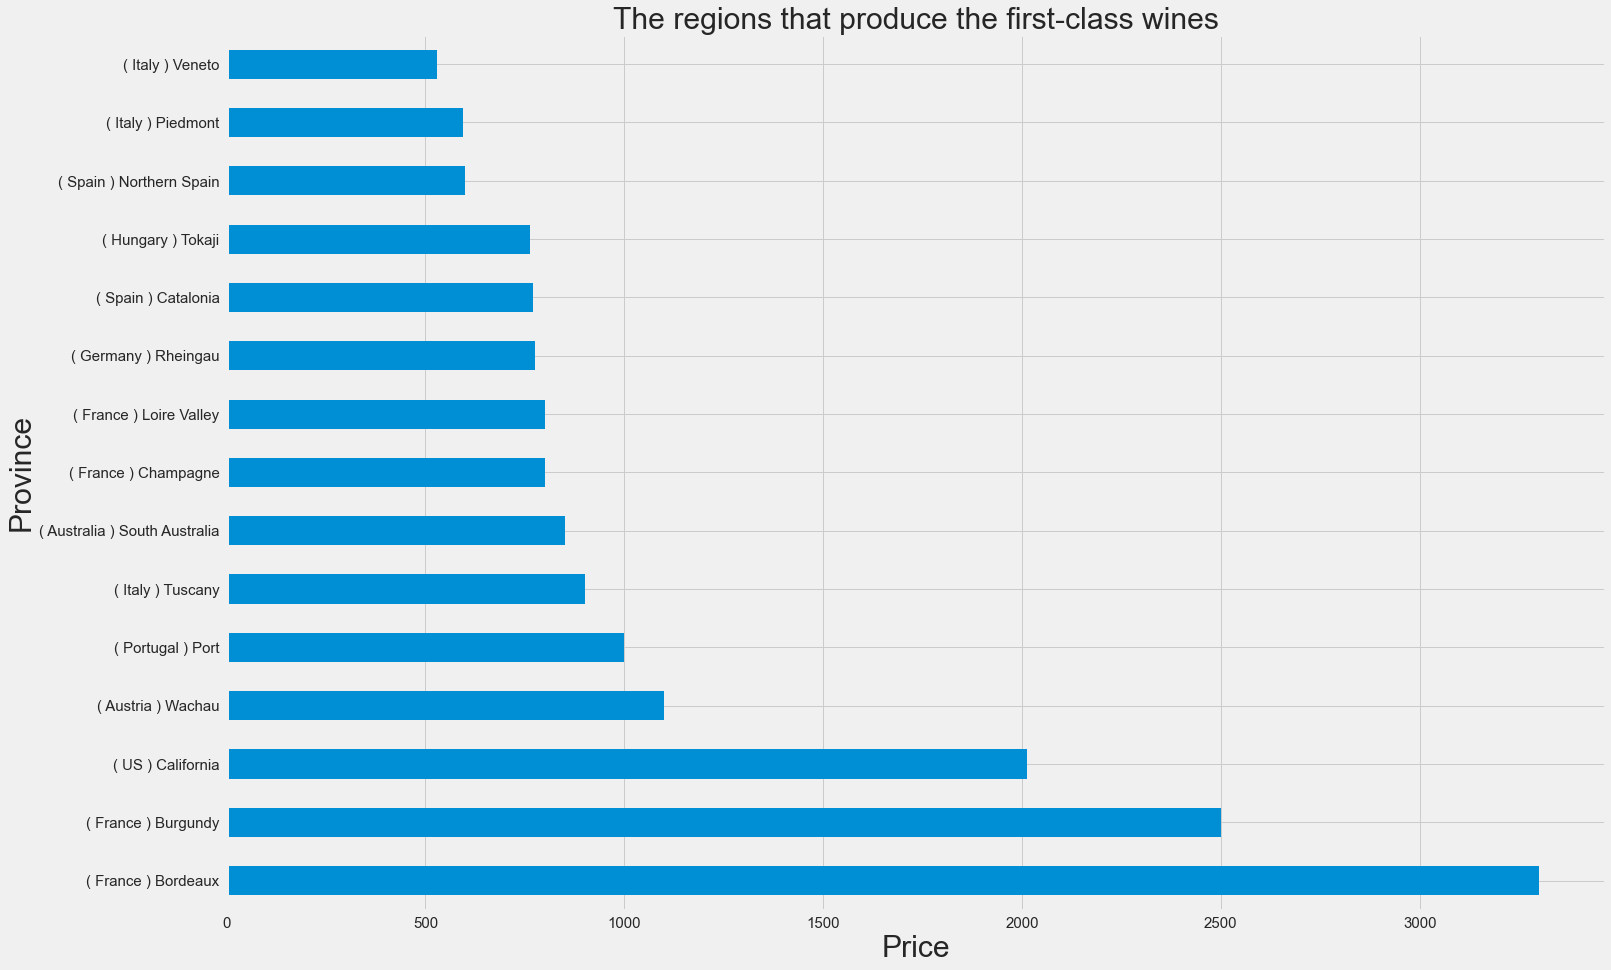

In [86]:
price_in_best_place = wine_df.groupby('provinceOfCountry')['price'].agg('max').sort_values(ascending = False)
price_in_best_place[:15].plot.barh(use_index = True)
plt.xlabel('Price', fontsize=30)
plt.ylabel('Province', fontsize = 30)
plt.title('The regions that produce the first-class wines', fontsize = 30)